<a href="https://colab.research.google.com/github/EmilioSantiagoCS/Valores-At-picos/blob/main/3_Valores_At%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving Ventas_totales_sin_nulos.csv to Ventas_totales_sin_nulos.csv


{'Ventas_totales_sin_nulos.csv': b',indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,ventas_totales_grupo_articulos,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros,tarjetas_credito \n0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,10230100.13,6864575.384,9047205.493,1716991.073,27858872.08,18043789.16,3514467.398,6705475.318,945906.3068,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309,9047205.493\n1,01/02/2017,25994.2,25223.4,25994200.17,25749179.4,245020.769,25994200.17,9719067.341,6438494.011,8309150.301,1527488.518,25994200.17,17656879.08,3344456.931,6576624.803,925618.6147,2855639.

In [ ]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Ventas_totales_sin_nulos.csv')
data

In [ ]:
#Eliminar columnas innecesarias
data= data.drop(['Unnamed: 0'], axis=1)
data

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

**PROCEDIMIENTO PARA SEPARAR DATAFRAME EN 2 PARTES (CUANTITATIVAS Y CUALITATIVAS)**




In [11]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         65 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      65 non-null     float64
 9   tarjetas_credito                     65 non-null     float64
 10  otros_medios                         65 non-null     float64
 11  ventas_totales_grupo_articulos    

In [ ]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data.iloc[ : , 1:25]
Cuantitativas

In [ ]:
#Filtro para obtener variables cualitativas
Cualitativas=data.iloc[ : , [0]]
Cualitativas

<Figure size 1500x800 with 0 Axes>

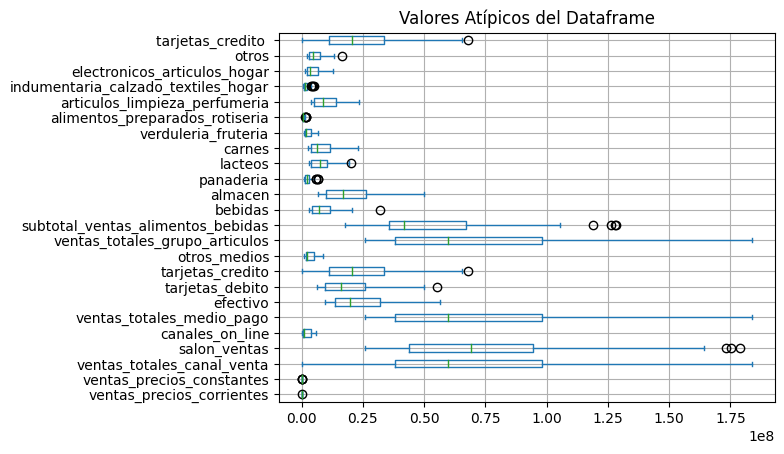

In [27]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.grid()
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**



In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=Cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [29]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Datos_sin_Outliers= Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

In [ ]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=Datos_sin_Outliers.copy()
data_clean=data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

In [ ]:
Dataframe_final = pd.concat([Cualitativas, data_clean], axis=1)
Dataframe_final

In [ ]:
Dataframe_final.info()

In [36]:
#Convertir DataFrame a CSV
Dataframe_final.to_csv("Dataframe_procesado.csv")

In [37]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Dataframe_procesado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>